In [34]:
import numpy as np
import pandas as pd 

df = pd.read_csv("data.csv")
df

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
0,20170103,4:00:03.721099000,P,JPM,NaN,T,100,86.65,0
1,20170103,4:27:33.920431000,P,JPM,NaN,T,260,86.98,0
2,20170103,5:01:32.187821000,P,JPM,NaN,TI,20,87.23,0
3,20170103,6:26:42.731130000,P,JPM,NaN,T,500,87.19,0
4,20170103,6:26:42.731187000,P,JPM,NaN,T,100,87.19,0
...,...,...,...,...,...,...,...,...,...
1958179,20170131,15:59:49.429934000,N,JPM,WS,@,100,43.06,0
1958180,20170131,16:00:00.042605000,P,JPM,WS,M,100,43.06,0
1958181,20170131,16:00:00.472462000,T,JPM,WS,M,400,43.09,0
1958182,20170131,16:00:08.992723000,N,JPM,WS,6,2175,43.02,0


In [2]:
#prepare data
df = df[(df["SYM_SUFFIX"].isin([np.nan])) & (df["TR_SCOND"].isin(['@'])) & (df["TR_CORR"].isin([0]))]
df

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
299,20170103,9:30:00.092353000,K,JPM,NaN,@,110,87.34,0
302,20170103,9:30:00.145979000,P,JPM,NaN,@,100,87.36,0
303,20170103,9:30:00.146330000,K,JPM,NaN,@,200,87.36,0
304,20170103,9:30:00.146465000,K,JPM,NaN,@,100,87.36,0
309,20170103,9:30:00.175890000,P,JPM,NaN,@,100,87.37,0
...,...,...,...,...,...,...,...,...,...
1956013,20170131,16:00:00.186694000,D,JPM,NaN,@,101,84.61,0
1956016,20170131,16:00:00.428384000,D,JPM,NaN,@,100,84.61,0
1956017,20170131,16:00:00.428410000,D,JPM,NaN,@,200,84.61,0
1956018,20170131,16:00:00.431610000,D,JPM,NaN,@,101,84.61,0


In [14]:
newdf = pd.DataFrame()
for i in range(0, len(df)-1):
    if(df.iloc[i+1,1][-15:-13] != df.iloc[i,1][-15:-13]):
        newdf = newdf.append(  df[df['TIME_M'].isin([df.iloc[i,1]])]  )
    if i%10000 == 0:
        print(i/10000, end=" ")
newdf

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
1258,20170103,9:30:59.039100000,D,JPM,NaN,@,600,87.4000,0
2052,20170103,9:31:59.761271000,D,JPM,NaN,@,100,87.2500,0
2523,20170103,9:32:58.601443000,X,JPM,NaN,@,200,87.1400,0
3176,20170103,9:33:59.861723000,D,JPM,NaN,@,100,87.2774,0
3850,20170103,9:34:59.037733000,T,JPM,NaN,@,100,87.3700,0
...,...,...,...,...,...,...,...,...,...
1952473,20170131,15:55:59.095543000,D,JPM,NaN,@,100,84.5200,0
1952840,20170131,15:56:58.914342000,N,JPM,NaN,@,600,84.5100,0
1953353,20170131,15:57:59.602799000,B,JPM,NaN,@,100,84.5100,0
1954258,20170131,15:58:59.906246000,D,JPM,NaN,@,200,84.5850,0


In [33]:
data1 = newdf.drop_duplicates(subset=['TIME_M'],keep='first')
data2 = newdf.drop_duplicates(subset=['TIME_M'],keep=False)
data2.append(data1).drop_duplicates(subset=['TIME_M'],keep=False)

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
225596,20170105,10:59:59.933761000,T,JPM,NaN,@,100,85.88,0
433860,20170109,15:14:59.153478000,D,JPM,NaN,@,100,86.40,0
551093,20170111,10:29:59.999537000,N,JPM,NaN,@,100,86.49,0
576131,20170111,12:31:59.831421000,T,JPM,NaN,@,100,86.52,0
1462242,20170124,11:03:59.851805000,J,JPM,NaN,@,100,84.31,0
1933055,20170131,14:42:52.070632000,D,JPM,NaN,@,100,84.33,0


In [41]:
df[225595:225600]

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
225595,20170105,10:59:59.932913000,P,JPM,NaN,I,63,85.88,0
225596,20170105,10:59:59.933761000,T,JPM,NaN,@,100,85.88,0
225597,20170105,10:59:59.933761000,T,JPM,NaN,@,100,85.88,0
225598,20170105,10:59:59.933761000,T,JPM,NaN,@,100,85.88,0
225599,20170105,11:00:00.111708000,D,JPM,NaN,I,2,85.89,0


In [43]:
newdf = newdf.drop_duplicates(subset=['TIME_M'],keep='first')

for i in range(0, len(newdf)):
    time = str(int(newdf.iloc[i,1][-15:-13]) + 1)
    newdf.iloc[i,1] = newdf.iloc[i,1][:-15] + time
newdf

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
1258,20170103,9:31,D,JPM,NaN,@,600,87.4000,0
2052,20170103,9:32,D,JPM,NaN,@,100,87.2500,0
2523,20170103,9:33,X,JPM,NaN,@,200,87.1400,0
3176,20170103,9:34,D,JPM,NaN,@,100,87.2774,0
3850,20170103,9:35,T,JPM,NaN,@,100,87.3700,0
...,...,...,...,...,...,...,...,...,...
1952473,20170131,15:56,D,JPM,NaN,@,100,84.5200,0
1952840,20170131,15:57,N,JPM,NaN,@,600,84.5100,0
1953353,20170131,15:58,B,JPM,NaN,@,100,84.5100,0
1954258,20170131,15:59,D,JPM,NaN,@,200,84.5850,0


In [44]:
newdf=newdf[~newdf['TIME_M'].isin(["16:1"])]
newdf

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR
1258,20170103,9:31,D,JPM,NaN,@,600,87.4000,0
2052,20170103,9:32,D,JPM,NaN,@,100,87.2500,0
2523,20170103,9:33,X,JPM,NaN,@,200,87.1400,0
3176,20170103,9:34,D,JPM,NaN,@,100,87.2774,0
3850,20170103,9:35,T,JPM,NaN,@,100,87.3700,0
...,...,...,...,...,...,...,...,...,...
1952473,20170131,15:56,D,JPM,NaN,@,100,84.5200,0
1952840,20170131,15:57,N,JPM,NaN,@,600,84.5100,0
1953353,20170131,15:58,B,JPM,NaN,@,100,84.5100,0
1954258,20170131,15:59,D,JPM,NaN,@,200,84.5850,0


In [6]:
dates = newdf["DATE"].unique()
dates

array([20170103, 20170104, 20170105, 20170106, 20170109, 20170110,
       20170111, 20170112, 20170113, 20170117, 20170118, 20170119,
       20170120, 20170123, 20170124, 20170125, 20170126, 20170127,
       20170130, 20170131])

In [7]:
len(dates)

20

# Realized variance when the market is open for a liquid stock.

In [45]:
import math

realized_variance = []
for date in dates:
    realized_variance_open = []
    df_date = newdf.loc[newdf['DATE'] == date]
    df_date = df_date[14:]
    for i in range(0, len(df_date)-1):
        R_t = math.log(df_date.iloc[i+1,7]/df_date.iloc[i,7])
        realized_variance_open.append(R_t**2)
    realized_variance.append(sum(realized_variance_open))

print("In 1-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance))

In 1-minute frequency, Average of 20 realized variance =  7.008606340290103e-05


# Average realized variance estimator

In [46]:
realized_variance_2 = []
realized_variance_5 = []
realized_variance_10 = []
realized_variance_15 = []

#calculate 15min RV need to calculate RV begin in 0,1,2,...14min and avg it 
#so called average Realized Variance
for date in dates:
    df_date = newdf.loc[newdf['DATE'] == date]
    df_date = df_date[14:]
    
    RV_S_2 = []
    for minute in range(0, 2):
        realized_variance_open_2 = []
        for i in range(minute, (len(df_date)-2), 2):
            R_t = (math.log(df_date.iloc[i+2,7]/df_date.iloc[i,7]))
            realized_variance_open_2.append(R_t**2)
        RV_S_2.append(sum(realized_variance_open_2))
    realized_variance_2.append(np.mean(RV_S_2))    
    
    RV_S_5 = []
    for minute in range(0, 5):
        realized_variance_open_5 = []
        for i in range(minute, (len(df_date)-5), 5):
            R_t = (math.log(df_date.iloc[i+5,7]/df_date.iloc[i,7]))
            realized_variance_open_5.append(R_t**2)
        RV_S_5.append(sum(realized_variance_open_5))
    realized_variance_5.append(np.mean(RV_S_5)) 
   
    RV_S_10 = []
    for minute in range(0, 10):
        realized_variance_open_10 = []
        for i in range(minute, (len(df_date)-10), 10):
            R_t = (math.log(df_date.iloc[i+10,7]/df_date.iloc[i,7]))
            realized_variance_open_10.append(R_t**2)
        RV_S_10.append(sum(realized_variance_open_10))
    realized_variance_10.append(np.mean(RV_S_10)) 
    
     
    RV_S_15 = []
    for minute in range(0, 15):
        realized_variance_open_15 = []
        for i in range(minute, (len(df_date)-15), 15):
            R_t = (math.log(df_date.iloc[i+15,7]/df_date.iloc[i,7]))
            realized_variance_open_15.append(R_t**2)
        RV_S_15.append(sum(realized_variance_open_15))
    realized_variance_15.append(np.mean(RV_S_15))
    
print("In  2-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_2))
print("In  5-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_5))
print("In 10-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_10))
print("In 15-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_15))

In  2-minute frequency, Average of 20 realized variance =  6.647585047877969e-05
In  5-minute frequency, Average of 20 realized variance =  6.223444399722728e-05
In 10-minute frequency, Average of 20 realized variance =  6.049766753024077e-05
In 15-minute frequency, Average of 20 realized variance =  6.0224001851209085e-05


In [47]:
print("ratio of avg. RV based on 15-minute returns to 1-minute returns is:  "
      , np.mean(realized_variance_15)/np.mean(realized_variance))
print("ratio of avg. RV based on 15-minute returns to 10-minute returns is: "
      , np.mean(realized_variance_15)/np.mean(realized_variance_10))

ratio of avg. RV based on 15-minute returns to 1-minute returns is:   0.8592864105521479
ratio of avg. RV based on 15-minute returns to 10-minute returns is:  0.9954764259482418


In [48]:
#scaled RV
#To solve the problem that RV started at diff time have diff number

realized_variance_2 = []
realized_variance_5 = []
realized_variance_10 = []
realized_variance_15 = []

scale_2 = (1 + 1 * 185/184 )/2
scale_5 = (1 + 4 * 74/73 )/5
scale_10 = (1 + 9 * 37/36 )/10
scale_15 = (1 + 14 * 25/24 )/15

for date in dates:
    df_date = newdf.loc[newdf['DATE'] == date]
    df_date = df_date[14:]
    
    RV_S_2 = []
    for minute in range(0, 2):
        realized_variance_open_2 = []
        for i in range(minute, (len(df_date)-2), 2):
            R_t = (math.log(df_date.iloc[i+2,7]/df_date.iloc[i,7]))
            realized_variance_open_2.append(R_t**2)
        RV_S_2.append(scale_2*sum(realized_variance_open_2))
    realized_variance_2.append(np.mean(RV_S_2))    
    
    RV_S_5 = []
    for minute in range(0, 5):
        realized_variance_open_5 = []
        for i in range(minute, (len(df_date)-5), 5):
            R_t = (math.log(df_date.iloc[i+5,7]/df_date.iloc[i,7]))
            realized_variance_open_5.append(R_t**2)
        RV_S_5.append(scale_5*sum(realized_variance_open_5))
    realized_variance_5.append(np.mean(RV_S_5)) 
   
    RV_S_10 = []
    for minute in range(0, 10):
        realized_variance_open_10 = []
        for i in range(minute, (len(df_date)-10), 10):
            R_t = (math.log(df_date.iloc[i+10,7]/df_date.iloc[i,7]))
            realized_variance_open_10.append(R_t**2)
        RV_S_10.append(scale_10*sum(realized_variance_open_10))
    realized_variance_10.append(np.mean(RV_S_10)) 
    
     
    RV_S_15 = []
    for minute in range(0, 15):
        realized_variance_open_15 = []
        for i in range(minute, (len(df_date)-15), 15):
            R_t = (math.log(df_date.iloc[i+15,7]/df_date.iloc[i,7]))
            realized_variance_open_15.append(R_t**2)
        RV_S_15.append(scale_15*sum(realized_variance_open_15))
    realized_variance_15.append(np.mean(RV_S_15)) 

print("AFTER SCALED: ")
print("In  2-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_2))
print("In  5-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_5))
print("In 10-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_10))
print("In 15-minute frequency, Average of 20 realized variance = ", np.mean(realized_variance_15))

AFTER SCALED: 
In  2-minute frequency, Average of 20 realized variance =  6.665649137681983e-05
In  5-minute frequency, Average of 20 realized variance =  6.291646530130648e-05
In 10-minute frequency, Average of 20 realized variance =  6.201010921849679e-05
In 15-minute frequency, Average of 20 realized variance =  6.256604636764499e-05


In [49]:
print("ratio of avg. RV based on 15-minute returns to 1-minute returns is:  "
      , np.mean(realized_variance_15)/np.mean(realized_variance))
print("ratio of avg. RV based on 15-minute returns to 10-minute returns is: "
      , np.mean(realized_variance_15)/np.mean(realized_variance_10))

ratio of avg. RV based on 15-minute returns to 1-minute returns is:   0.8927031042958425
ratio of avg. RV based on 15-minute returns to 10-minute returns is:  1.0089652664082451


# Autocorrelation of realized variance 

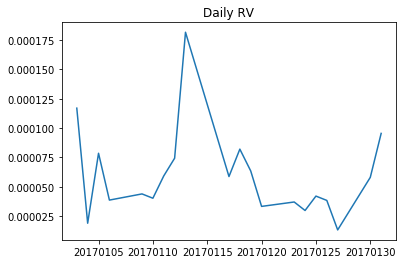

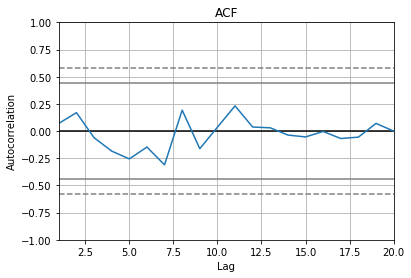

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig, ax = plt.subplots()
ax.plot(dates, np.array(realized_variance_15))
ax.ticklabel_format(useOffset=False, style='plain')
plt.title("Daily RV")
plt.show()

ax1 = pd.plotting.autocorrelation_plot(pd.Series(realized_variance_15))
plt.title("ACF")
plt.show()

In [70]:
print(pd.Series(realized_variance).autocorr(lag=1))
print(pd.Series(realized_variance_2).autocorr(lag=1))
print(pd.Series(realized_variance_5).autocorr(lag=1))
print(pd.Series(realized_variance_10).autocorr(lag=1))
print(pd.Series(realized_variance_15).autocorr(lag=1))

0.47903635429756725
0.4831219719758977
0.35806830228325376
0.1587274859730504
0.07311379698594504


# 24-hour realized variance estimator.

In [22]:
JPM = pd.read_csv("JPM.csv")
JPM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-30,86.099998,86.419998,85.660004,86.290001,79.013107,13617800
1,2017-01-03,87.339996,87.760002,85.980003,87.230003,79.873833,20550700
2,2017-01-04,86.959999,87.180000,86.400002,86.910004,80.021156,15266600
3,2017-01-05,86.809998,87.110001,85.260002,86.110001,79.284569,14300800
4,2017-01-06,86.389999,86.620003,85.940002,86.120003,79.293770,12893300
5,2017-01-09,85.730003,86.769997,85.519997,86.180000,79.349007,12806600
6,2017-01-10,86.070000,86.900002,85.720001,86.430000,79.579185,13989000
7,2017-01-11,86.430000,87.080002,85.910004,87.080002,80.177681,14713100
8,2017-01-12,86.760002,87.269997,86.019997,86.239998,79.404236,21337400
9,2017-01-13,87.110001,88.169998,86.099998,86.699997,79.827789,28296000


In [23]:
print(realized_variance_15)
print(len(realized_variance_15))

[0.00011696425230007722, 1.8988705452355232e-05, 7.855595034664815e-05, 3.869326427453696e-05, 4.394451843783659e-05, 4.027611422793448e-05, 5.9270085010515486e-05, 7.43428307554e-05, 0.00018159958285104868, 5.873501256993022e-05, 8.207671930861883e-05, 6.34995837605222e-05, 3.3318137966135846e-05, 3.7068814381453e-05, 2.9833784342573868e-05, 4.2094220212983333e-05, 3.8404543817601445e-05, 1.3294657644302177e-05, 5.804873586641487e-05, 9.547052349729294e-05]
20


In [24]:
#APPROACH 1
#scaled by daily close-to-close squared return

SQ_R = []
for i in range(0, len(JPM)-1):
    SQ_R. append( ( math.log(JPM.iloc[i+1, 4]/JPM.iloc[i, 4]) )**2 )
ratio = sum(SQ_R)/sum(realized_variance_15)
RV_24H_1 = []
for i in range(0, len(realized_variance_15)):
    RV_24H_1.append(ratio*realized_variance_15[i]) 
    
print("By Approach 1, average RV = ", np.mean(RV_24H_1))

By Approach 1, average RV =  0.00013520101463649674


In [25]:
#APPROACH 2
#add close-to-open squared return

close_to_open_sq_return = []

for i in range(0, len(JPM)-1):
    close_to_open_sq_return.append(( math.log(JPM.iloc[i+1, 1]/JPM.iloc[i, 4]) )**2 )

RV_24H_2 = []
for i in range(0, len(realized_variance_15)):
    RV_24H_2.append(close_to_open_sq_return[i] + realized_variance_15[i])

print("By Approach 2, average RV = ", np.mean(RV_24H_2))

By Approach 2, average RV =  0.00011190790603220664
